<!-- @format -->

DETECTION OF COVID-19 OR PNEMONIA USING X-RAY IMAGES
Include your name and ID here:

1. Victor Umesiobi (Q2094874)
2. Jingqi Yuan (P1179164)
3. Jieyun Zhang (P1180504)
4. Ruchen Liu (P1180236)
5. Dingding Yao (P1180133)

Problem Statement
In 2020, covid hit the world, and we have x-ray images of the chest region and we want to be able to easily detect covid and its difference from pnemonia

Dataset
https://www.kaggle.com/datasets/amanullahasraf/covid19-pneumonia-normal-chest-xray-pa-dataset/data

Decision
What kind of model do we use to train and why
Cleaning and preparation of data
Differences and relationships between data (showing graphs)
Training of data
Inference (show graphs and accuracy)
Pratical use (create an endpoint and basic html that uses our model)


In [7]:
from datetime  import datetime
import cv2
import torchvision
from torchvision import datasets, models, transforms
from torch.optim import lr_scheduler
import torchvision.models as models
from image_dataset import ImageDataset
from torch.utils.data import DataLoader
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from tqdm import tqdm
import numpy as np
import urllib.request
import ssl
import seaborn as sns
import matplotlib.pyplot as plt

from image_dataset import ImageDataset

In [8]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
EPOCHS = 5
BATCHSIZE = 4
NUM_CLASSES = 3

In [9]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Transform for validation (without RandomHorizontalFlip)
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dataset = ImageDatasetExtra(path_name="train-1",transform=train_transform)
train_data_loader = DataLoader(train_dataset, batch_size=BATCHSIZE, shuffle=True)

val_dataset = ImageDatasetExtra(path_name="val-1", transform=val_transform)
val_dataloader = DataLoader(val_dataset, batch_size=BATCHSIZE, shuffle=True)

Class path: train-1/pneumonia
Adding file: train-1/pneumonia/person661_bacteria_2553.jpeg
Adding file: train-1/pneumonia/person1353_virus_2333.jpeg
Adding file: train-1/pneumonia/person124_virus_238.jpeg
Adding file: train-1/pneumonia/person1619_bacteria_4261.jpeg
Adding file: train-1/pneumonia/person1491_bacteria_3893.jpeg
Adding file: train-1/pneumonia/person321_bacteria_1489.jpeg
Adding file: train-1/pneumonia/person688_bacteria_2584.jpeg
Adding file: train-1/pneumonia/person535_virus_1062.jpeg
Adding file: train-1/pneumonia/person581_bacteria_2392.jpeg
Adding file: train-1/pneumonia/person1253_virus_2129.jpeg
Adding file: train-1/pneumonia/person1415_bacteria_3629.jpeg
Adding file: train-1/pneumonia/person472_bacteria_2015.jpeg
Adding file: train-1/pneumonia/person437_bacteria_1887.jpeg
Adding file: train-1/pneumonia/person60_bacteria_287.jpeg
Adding file: train-1/pneumonia/person616_bacteria_2487.jpeg
Adding file: train-1/pneumonia/person1372_bacteria_3500.jpeg
Adding file: train-

Index: 0, Dataset Size: 4116
Loaded image at train-1/pneumonia/person661_bacteria_2553.jpeg with label pneumonia
Index: 1, Dataset Size: 4116
Loaded image at train-1/pneumonia/person1353_virus_2333.jpeg with label pneumonia
Index: 2, Dataset Size: 4116
Loaded image at train-1/pneumonia/person124_virus_238.jpeg with label pneumonia
Index: 3, Dataset Size: 4116
Loaded image at train-1/pneumonia/person1619_bacteria_4261.jpeg with label pneumonia
Index: 4, Dataset Size: 4116
Loaded image at train-1/pneumonia/person1491_bacteria_3893.jpeg with label pneumonia
Index: 5, Dataset Size: 4116
Loaded image at train-1/pneumonia/person321_bacteria_1489.jpeg with label pneumonia
Index: 6, Dataset Size: 4116
Loaded image at train-1/pneumonia/person688_bacteria_2584.jpeg with label pneumonia
Index: 7, Dataset Size: 4116
Loaded image at train-1/pneumonia/person535_virus_1062.jpeg with label pneumonia
Index: 8, Dataset Size: 4116
Loaded image at train-1/pneumonia/person581_bacteria_2392.jpeg with label 

libpng warning: cHRM: invalid values


Loaded image at train-1/covid/468.jpg with label covid
Index: 3758, Dataset Size: 4116
Loaded image at train-1/covid/090.jpeg with label covid
Index: 3759, Dataset Size: 4116
Loaded image at train-1/covid/332.jpg with label covid
Index: 3760, Dataset Size: 4116
Loaded image at train-1/covid/326.jpg with label covid
Index: 3761, Dataset Size: 4116
Loaded image at train-1/covid/COVID19(140).jpg with label covid
Index: 3762, Dataset Size: 4116
Loaded image at train-1/covid/COVID-19 (264).jpg with label covid
Index: 3763, Dataset Size: 4116
Loaded image at train-1/covid/COVID-19 (634).jpg with label covid
Index: 3764, Dataset Size: 4116
Loaded image at train-1/covid/COVID-19 (2).jpeg with label covid
Index: 3765, Dataset Size: 4116
Loaded image at train-1/covid/497.jpg with label covid
Index: 3766, Dataset Size: 4116
Loaded image at train-1/covid/642.png with label covid
Index: 3767, Dataset Size: 4116
Loaded image at train-1/covid/124.png with label covid
Index: 3768, Dataset Size: 4116
L

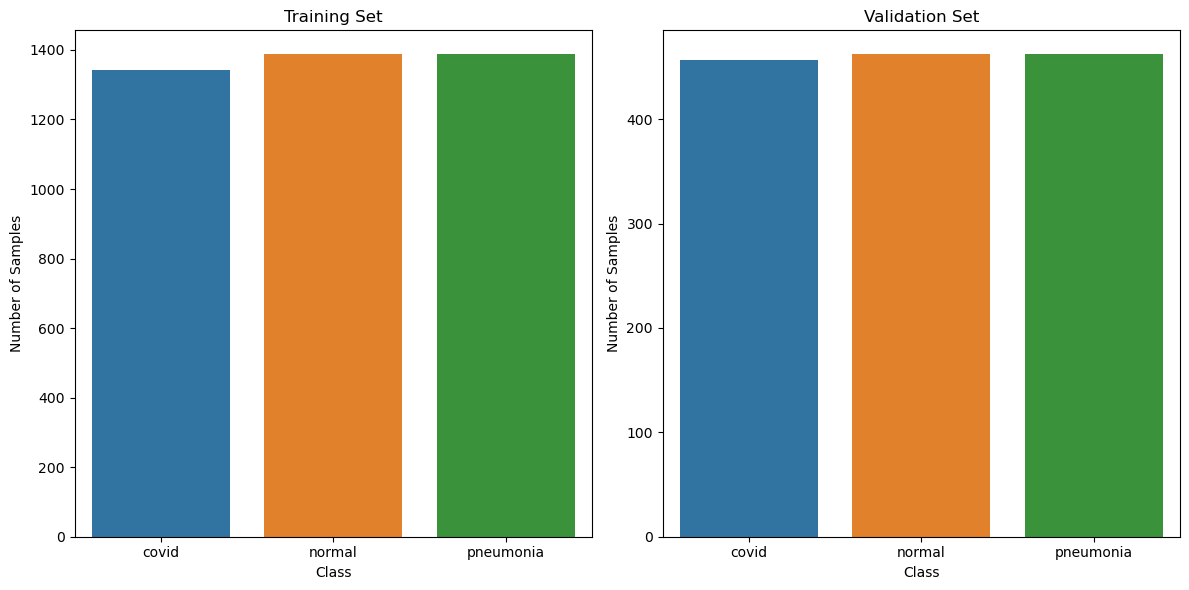

Index: 0, Dataset Size: 4116
Loaded image at train-1/pneumonia/person661_bacteria_2553.jpeg with label pneumonia
Index: 1, Dataset Size: 4116
Loaded image at train-1/pneumonia/person1353_virus_2333.jpeg with label pneumonia
Index: 2, Dataset Size: 4116
Loaded image at train-1/pneumonia/person124_virus_238.jpeg with label pneumonia
Index: 3, Dataset Size: 4116
Loaded image at train-1/pneumonia/person1619_bacteria_4261.jpeg with label pneumonia
Index: 4, Dataset Size: 4116
Loaded image at train-1/pneumonia/person1491_bacteria_3893.jpeg with label pneumonia
Index: 5, Dataset Size: 4116
Loaded image at train-1/pneumonia/person321_bacteria_1489.jpeg with label pneumonia
Index: 6, Dataset Size: 4116
Loaded image at train-1/pneumonia/person688_bacteria_2584.jpeg with label pneumonia
Index: 7, Dataset Size: 4116
Loaded image at train-1/pneumonia/person535_virus_1062.jpeg with label pneumonia
Index: 8, Dataset Size: 4116
Loaded image at train-1/pneumonia/person581_bacteria_2392.jpeg with label 

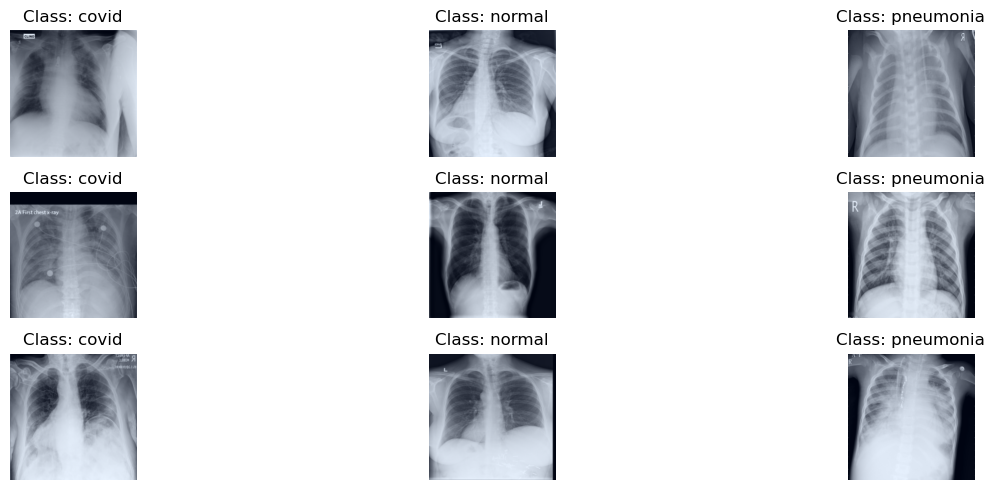

/Users/victorumesiobi/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/victorumesiobi/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
def count_samples(dataset):
    # Count the number of samples in each class
    class_counts = {"covid": 0, "normal": 0, "pneumonia": 0}
    
    for i in range(len(dataset)):
        _, label_idx = dataset[i]
        label = dataset.idx_to_label(label_idx.item())  # Convert tensor to string label
        class_counts[label] += 1
    
    return class_counts



def plot_class_distribution(dataset_1, dataset_2):
    train_counts = count_samples(dataset_1)
    val_counts = count_samples(dataset_2)

    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), ax=ax[0])
    ax[0].set_title("Training Set")
    ax[0].set_ylabel("Number of Samples")
    ax[0].set_xlabel("Class")

    sns.barplot(x=list(val_counts.keys()), y=list(val_counts.values()), ax=ax[1])
    ax[1].set_title("Validation Set")
    ax[1].set_ylabel("Number of Samples")
    ax[1].set_xlabel("Class")

    plt.tight_layout()
    plt.show()


def show_images_from_classes(dataset, num_images=3):
    # Store images for each class
    images_to_show = {'covid': [], 'normal': [], 'pneumonia': []}

    for image, label_idx in dataset:
        label = dataset.idx_to_label(label_idx.item())  # Convert tensor to string label
        if len(images_to_show[label]) < num_images:
            image_np = image.numpy()
            image_np = (image_np - image_np.min()) / (image_np.max() - image_np.min())
            images_to_show[label].append(image_np)

        if all(len(images) == num_images for images in images_to_show.values()):
            break

    # Plotting
    fig, axes = plt.subplots(num_images, len(images_to_show), figsize=(15, 5))

    for i, (label, images) in enumerate(images_to_show.items()):
        for j, image in enumerate(images):
            ax = axes[j][i] if num_images > 1 else axes[i]
            ax.imshow(np.transpose(image, (1, 2, 0)))  # Convert image back to HxWxC format
            ax.set_title(f"Class: {label}")
            ax.axis('off')

    plt.tight_layout()
    plt.show()


plot_class_distribution(train_dataset, val_dataset)

show_images_from_classes(train_dataset)



model = models.densenet121(pretrained=True)
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, NUM_CLASSES)

model = model.to(DEVICE)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

train_losses, val_losses = [], []

In [12]:
model = models.densenet121(pretrained=True)
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, NUM_CLASSES)

model = model.to(DEVICE)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

train_losses, val_losses = [], []

In [13]:
model = models.densenet121(pretrained=True)
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, NUM_CLASSES)

model = model.to(DEVICE)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

train_losses, val_losses = [], []

In [14]:
start_time = datetime.now()
print(f"Training started at {start_time.strftime('%Y-%m-%d %H:%M:%S')}")

Training started at 2023-12-07 05:19:40


In [15]:
for epoch in range(EPOCHS):
    model.train()
    running_train_loss, running_val_loss = 0.0, 0.0

    for i, data in enumerate(train_data_loader):
        image, label = data
        image = image.to(DEVICE)
        label = label.to(DEVICE)

        optimizer.zero_grad()

        output = model(image.float())

        train_loss = criterion(output.float(), label.long())

        train_loss.backward()
        optimizer.step()

        running_train_loss += train_loss.item()
        print(f"Epoch: {epoch}, Iteration: {i}, Loss: {train_loss.item()}")

    exp_lr_scheduler.step()  # Update the learning rate

    train_losses.append(running_train_loss)

    model.eval()
    with torch.no_grad():
        for i, data in enumerate(val_dataloader):
            image, label = data
            image = image.to(DEVICE)
            label = label.to(DEVICE)

            output = model(image.float())

            val_loss = criterion(output.float(), label.long())
            running_val_loss += val_loss.item()

    val_losses.append(running_val_loss)

Index: 1106, Dataset Size: 4116
Loaded image at train-1/pneumonia/person1648_bacteria_4373.jpeg with label pneumonia
Index: 2835, Dataset Size: 4116
Loaded image at train-1/covid/COVID19(260).jpg with label covid
Index: 153, Dataset Size: 4116
Loaded image at train-1/pneumonia/person535_bacteria_2256.jpeg with label pneumonia
Index: 1270, Dataset Size: 4116
Loaded image at train-1/pneumonia/person258_bacteria_1216.jpeg with label pneumonia
Epoch: 0, Iteration: 0, Loss: 1.065690279006958
Index: 1955, Dataset Size: 4116
Loaded image at train-1/normal/NORMAL2-IM-1045-0001.jpeg with label normal
Index: 908, Dataset Size: 4116
Loaded image at train-1/pneumonia/00017005_000.png with label pneumonia
Index: 2963, Dataset Size: 4116
Loaded image at train-1/covid/561.png with label covid
Index: 4057, Dataset Size: 4116
Loaded image at train-1/covid/COVID-19 (346).jpg with label covid
Epoch: 0, Iteration: 1, Loss: 1.9738972187042236
Index: 2984, Dataset Size: 4116
Loaded image at train-1/covid/CO

libpng warning: cHRM: invalid values


Epoch: 0, Iteration: 230, Loss: 6.3768205642700195
Index: 86, Dataset Size: 4116
Loaded image at train-1/pneumonia/00011973_015.png with label pneumonia
Index: 2030, Dataset Size: 4116
Loaded image at train-1/normal/00000129_001.png with label normal
Index: 879, Dataset Size: 4116
Loaded image at train-1/pneumonia/person1140_bacteria_3083.jpeg with label pneumonia
Index: 1993, Dataset Size: 4116
Loaded image at train-1/normal/00001196_000.png with label normal
Epoch: 0, Iteration: 231, Loss: 3.689150333404541
Index: 2432, Dataset Size: 4116
Loaded image at train-1/normal/00000796_004.png with label normal
Index: 4092, Dataset Size: 4116
Loaded image at train-1/covid/COVID19(449).jpg with label covid
Index: 1942, Dataset Size: 4116
Loaded image at train-1/normal/00001068_002.png with label normal
Index: 2401, Dataset Size: 4116
Loaded image at train-1/normal/00000289_002.png with label normal
Epoch: 0, Iteration: 232, Loss: 3.3389575481414795
Index: 989, Dataset Size: 4116
Loaded image 

libpng warning: cHRM: invalid values


Epoch: 1, Iteration: 40, Loss: 2.0449323654174805
Index: 1093, Dataset Size: 4116
Loaded image at train-1/pneumonia/person547_bacteria_2294.jpeg with label pneumonia
Index: 3882, Dataset Size: 4116
Loaded image at train-1/covid/COVID19(147).jpg with label covid
Index: 603, Dataset Size: 4116
Loaded image at train-1/pneumonia/person1502_bacteria_3929.jpeg with label pneumonia
Index: 3478, Dataset Size: 4116
Loaded image at train-1/covid/COVID19(481).jpg with label covid
Epoch: 1, Iteration: 41, Loss: 1.4939748048782349
Index: 2602, Dataset Size: 4116
Loaded image at train-1/normal/00000963_021.png with label normal
Index: 4034, Dataset Size: 4116
Loaded image at train-1/covid/COVID-19 (720).jpg with label covid
Index: 572, Dataset Size: 4116
Loaded image at train-1/pneumonia/person296_bacteria_1392.jpeg with label pneumonia
Index: 860, Dataset Size: 4116
Loaded image at train-1/pneumonia/person609_bacteria_2474.jpeg with label pneumonia
Epoch: 1, Iteration: 42, Loss: 0.594001054763794
I

libpng warning: cHRM: invalid values


Epoch: 2, Iteration: 352, Loss: 0.6987541913986206
Index: 625, Dataset Size: 4116
Loaded image at train-1/pneumonia/person28_bacteria_141.jpeg with label pneumonia
Index: 3418, Dataset Size: 4116
Loaded image at train-1/covid/114.jpeg with label covid
Index: 906, Dataset Size: 4116
Loaded image at train-1/pneumonia/person1236_virus_2096.jpeg with label pneumonia
Index: 1867, Dataset Size: 4116
Loaded image at train-1/normal/00000706_000.png with label normal
Epoch: 2, Iteration: 353, Loss: 0.31213000416755676
Index: 496, Dataset Size: 4116
Loaded image at train-1/pneumonia/person26_bacteria_132.jpeg with label pneumonia
Index: 769, Dataset Size: 4116
Loaded image at train-1/pneumonia/person643_bacteria_2534.jpeg with label pneumonia
Index: 2784, Dataset Size: 4116
Loaded image at train-1/covid/COVID-19 (646).jpg with label covid
Index: 1488, Dataset Size: 4116
Loaded image at train-1/normal/NORMAL2-IM-0496-0001.jpeg with label normal
Epoch: 2, Iteration: 354, Loss: 2.09029483795166
Ind

libpng warning: cHRM: invalid values


Epoch: 3, Iteration: 401, Loss: 1.0251352787017822
Index: 2846, Dataset Size: 4116
Loaded image at train-1/covid/COVID-19 (543).jpg with label covid
Index: 2027, Dataset Size: 4116
Loaded image at train-1/normal/00000947_003.png with label normal
Index: 3144, Dataset Size: 4116
Loaded image at train-1/covid/481p-.jpg with label covid
Index: 802, Dataset Size: 4116
Loaded image at train-1/pneumonia/person1174_virus_1980.jpeg with label pneumonia
Epoch: 3, Iteration: 402, Loss: 0.24264061450958252
Index: 2885, Dataset Size: 4116
Loaded image at train-1/covid/COVID-19 (172).jpg with label covid
Index: 1917, Dataset Size: 4116
Loaded image at train-1/normal/00001187_006.png with label normal
Index: 2619, Dataset Size: 4116
Loaded image at train-1/normal/00001203_000.png with label normal
Index: 1193, Dataset Size: 4116
Loaded image at train-1/pneumonia/00001946_007.png with label pneumonia
Epoch: 3, Iteration: 403, Loss: 0.5512805581092834
Index: 108, Dataset Size: 4116
Loaded image at tra

libpng warning: cHRM: invalid values


Epoch: 4, Iteration: 715, Loss: 1.1544662714004517
Index: 887, Dataset Size: 4116
Loaded image at train-1/pneumonia/person654_bacteria_2546.jpeg with label pneumonia
Index: 2160, Dataset Size: 4116
Loaded image at train-1/normal/00000882_006.png with label normal
Index: 2468, Dataset Size: 4116
Loaded image at train-1/normal/NORMAL2-IM-1256-0001.jpeg with label normal
Index: 2777, Dataset Size: 4116
Loaded image at train-1/covid/COVID-19 (98).jpg with label covid
Epoch: 4, Iteration: 716, Loss: 0.05323122441768646
Index: 3437, Dataset Size: 4116
Loaded image at train-1/covid/652.png with label covid
Index: 3373, Dataset Size: 4116
Loaded image at train-1/covid/COVID-19 (677).jpg with label covid
Index: 2656, Dataset Size: 4116
Loaded image at train-1/normal/00001319_001.png with label normal
Index: 1730, Dataset Size: 4116
Loaded image at train-1/normal/00000459_021.png with label normal
Epoch: 4, Iteration: 717, Loss: 0.25539156794548035
Index: 1222, Dataset Size: 4116
Loaded image at

Training completed at 2023-12-07 06:49:59
Total training duration: 1:30:19.353015


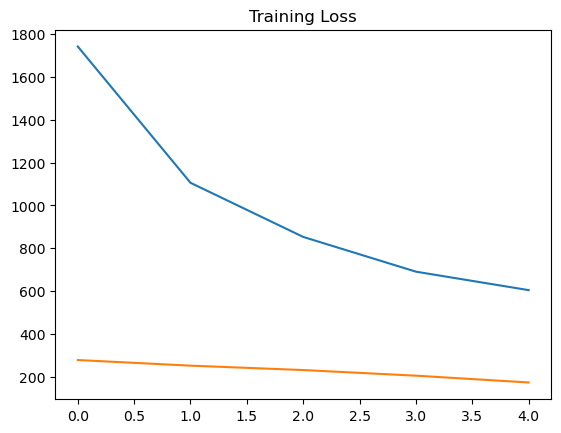

In [16]:
sns.lineplot(x=range(len(train_losses)), y=train_losses).set_title("Training Loss")
sns.lineplot(x=range(len(val_losses)), y=val_losses).set_title("Training Loss")


end_time = datetime.now()
print(f"Training completed at {end_time.strftime('%Y-%m-%d %H:%M:%S')}")


total_duration = end_time - start_time
print(f"Total training duration: {total_duration}")

In [17]:
torch.save(model.state_dict(), "model.pth")